In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns

In [2]:
path11 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 NobelpapersCD.zip'
path12 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 Nobelpapers.zip'
path21 = r'E:\netData\MAGzip\MAG Nobel\2 NobelpaperControls\20954 NobelpapercontrolsCD.zip'
path22 = r'E:\netData\MAGzip\MAG Nobel\2 NobelpaperControls\20954 Nobelpapercontrols.zip'

In [3]:
fNobel1 = pd.read_csv(path11)
fControl1 = pd.read_csv(path21)
fNobel2 = pd.read_csv(path12)
fControl2 = pd.read_csv(path22)

In [4]:
fNobel = pd.concat([fNobel1 , fNobel2] , axis = 1)
fControl = pd.concat([fControl1 , fControl2] , axis = 1)

fNobel = fNobel.loc[:, ~fNobel.columns.duplicated()]
fControl = fControl.loc[:, ~fControl.columns.duplicated()]

In [5]:
fNobel.fillna(0 , inplace=True)
fControl.fillna(0 , inplace=True)

In [6]:
fControl0 = fControl[['Field','cit','CD', 'DIsharp', 'DIeasy','C-CD P', 'ni']]
fControl0['If Prize'] = 0
fControl0.columns = ['Field','C','CD', 'DI*', 'sDI','C-CD P', 'DC','If Prize']

C:\Users\nd\AppData\Local\Temp\ipykernel_2588\1054060326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fControl0['If Prize'] = 0


In [7]:
fNobel0 = fNobel[['Field','cit','CD', 'DIsharp', 'DIeasy','C-CD P', 'ni']]
fNobel0['If Prize'] = 1
fNobel0.columns = ['Field','C','CD', 'DI*', 'sDI','C-CD P', 'DC','If Prize']

C:\Users\nd\AppData\Local\Temp\ipykernel_2588\2285804660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fNobel0['If Prize'] = 1


In [8]:
fNobel1 = fNobel0[fNobel0['Field']=='Physics']
fNobel2 = fNobel0[fNobel0['Field']=='Chemistry']
fNobel3 = fNobel0[fNobel0['Field']=='Medicine']

In [9]:
fControl1 = fControl0[fControl0['Field']=='Physics']
fControl2 = fControl0[fControl0['Field']=='Chemistry']
fControl3 = fControl0[fControl0['Field']=='Medicine']

In [10]:
ff1 = pd.concat([fNobel1 , fControl1])
ff2 = pd.concat([fNobel2 , fControl2])
ff3 = pd.concat([fNobel3 , fControl3])

# IR

In [11]:
def get_IR(threshold , v , f1):
    k = int(np.floor(len(f1)*threshold))
    totallau = len(f1[f1['If Prize']==1])
    f2 = f1.sort_values([v],ascending= False)
    f21 = f2.head(k)
    d = len(f21[f21['If Prize']==1])/totallau
    return d

In [12]:
flst = [ff1, ff2, ff3]

In [13]:
thresholds = [0.10,0.50]

In [14]:
vlst = ['C' , 'C-CD P','CD', 'DI*', 'sDI', 'DC']

In [15]:
plt.rcParams['font.sans-serif'] = ['Arial'] 

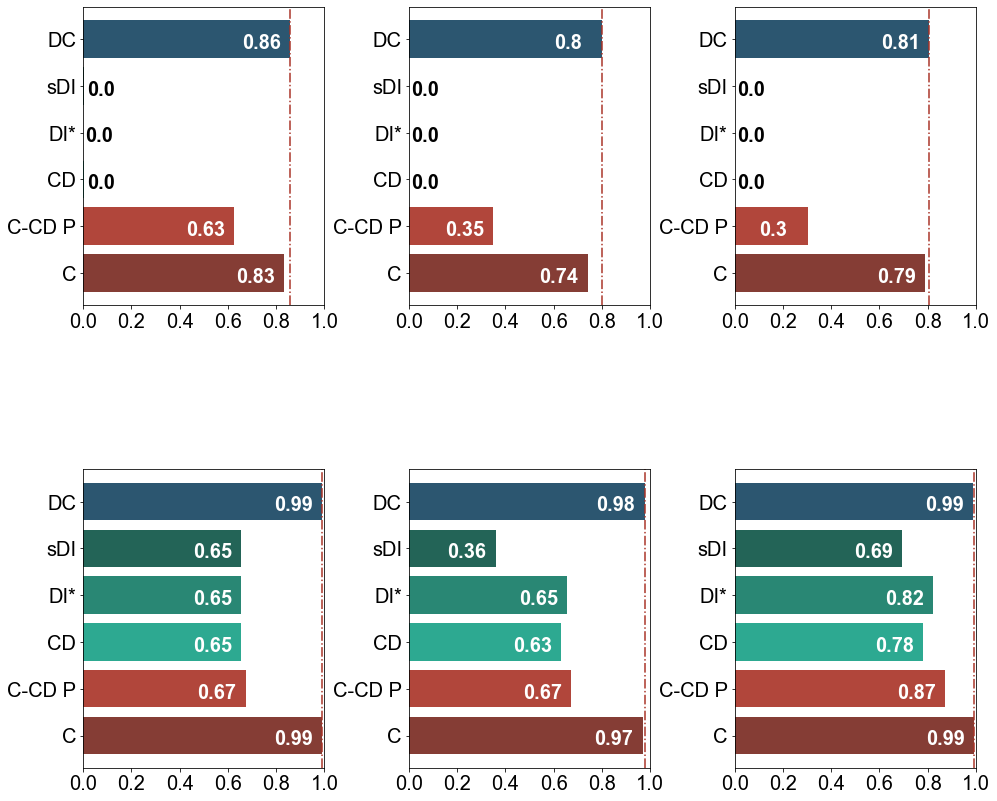

In [16]:
plt.subplots(2,3,figsize=(16,14))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.35,hspace=0.55)

for i in range(len(flst)):
    f = flst[i]
    for j in range(2):
        threshold = thresholds[j]
        dlst = [get_IR(threshold , v , f) for v in vlst]
        ax = plt.subplot(2,3,i+1+j*3)
        c = ['#78281F' , '#A93226', '#16A085', '#117A65', '#0B5345', "#154360"]
        y_pos = [1,2,3,4,5,6]      
        plt.axvline(x=max(dlst),ls = '-.', c = '#A93226')
        
        plt.barh(y_pos,dlst,align='center', color= c,alpha=0.9,capsize=10)
        plt.yticks(y_pos,['C','C-CD P','CD', 'DI*', 'sDI', 'DC'],fontsize = 20)
        plt.xlim(0,1)
        plt.xticks(fontsize=20)
        for k in range(len(dlst)):
            if dlst[k] < 0.1:
                plt.text(dlst[k]+0.01, y_pos[k]-0.2, str(round(dlst[k],2)), color='black', fontsize=20, fontweight='bold')
            else:
                plt.text(dlst[k]-0.2, y_pos[k]-0.2, str(round(dlst[k],2)), color='white', fontsize=20, fontweight='bold')
plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 5 6 A4\1.pdf",bbox_inches = 'tight')

In [17]:
#c = plt.rcParams['axes.prop_cycle'].by_key()['color']
thresholdlst = [0.01*i for i in range(1,100)]
c = ['#78281F' , '#A93226', '#16A085', '#117A65', '#0B5345', "#154360"]
markers = ['*','D','v','+','X','o']
titles = ['Physics' ,'Chemistry' ,'Medicine']

C:\Users\nd\AppData\Local\Temp\ipykernel_2588\2662922116.py:10: UserWarning: You passed a edgecolor/edgecolors ('#117A65') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(thresholdlst[2::3],d[2::3],s=350,marker=markers[i],c=c[i],edgecolors=c[i],alpha=0.6,label=v +" "+ str(np.round(np.mean(d),3)))


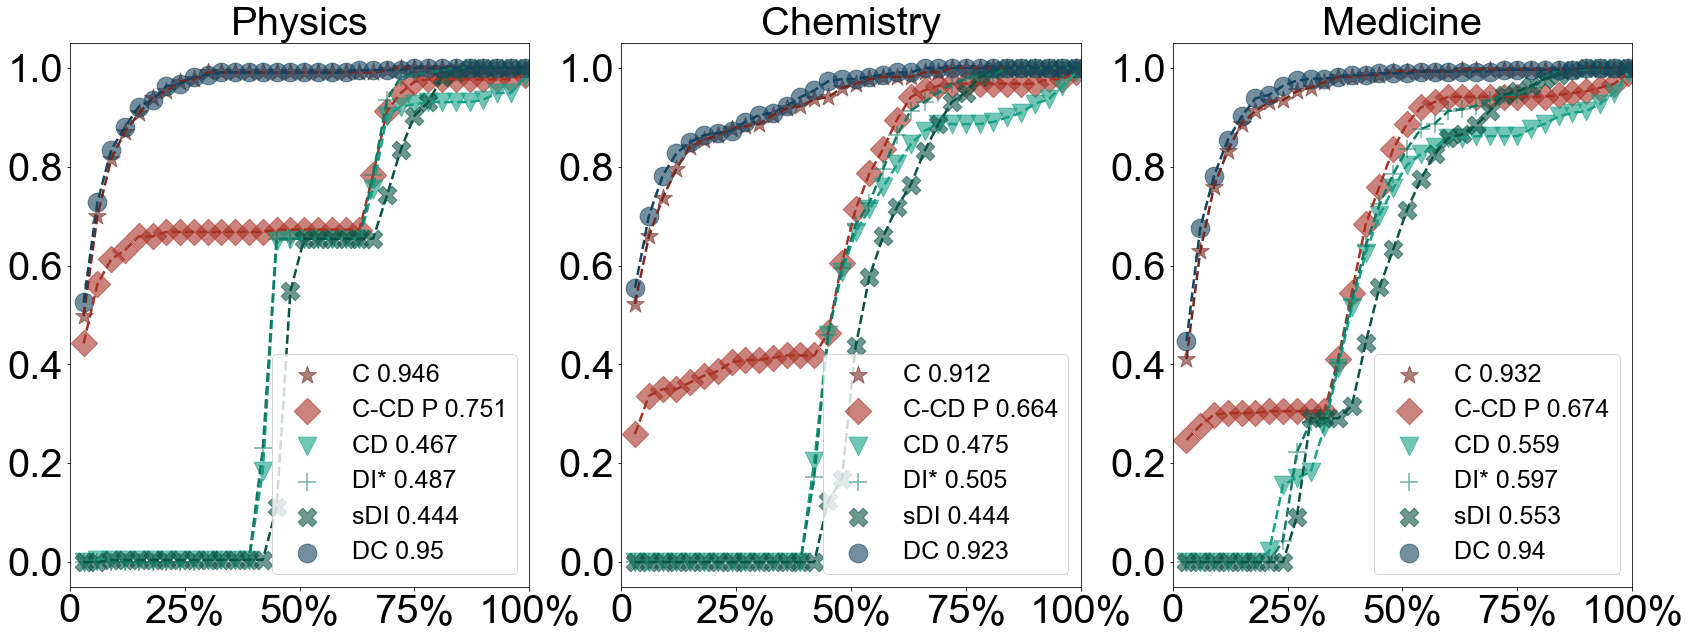

In [18]:
plt.subplots(1,3,figsize=(28,10))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.2 )

for j in range(len(flst)):
    ff = flst[j]
    ax = plt.subplot(1,3,j+1)
    for i in range(len(vlst)):
        v = vlst[i]
        d = np.array([get_IR(threshold , v , ff) for threshold in thresholdlst])
        plt.scatter(thresholdlst[2::3],d[2::3],s=350,marker=markers[i],c=c[i],edgecolors=c[i],alpha=0.6,label=v +" "+ str(np.round(np.mean(d),3)))
        plt.plot(thresholdlst[2::3],d[2::3],linestyle = '--', linewidth=2.5,alpha=1,color=c[i])
#     ax.set_yscale("log")
    plt.xlim(0,1)
    plt.xticks([0,0.25,0.5,0.75,1],[0,'25%','50%','75%','100%'],fontsize=40)
    plt.yticks(fontsize=40)
    plt.legend(fontsize =25,loc = 'lower right')
    plt.title(titles[j],fontsize =40)
plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 5 6 A4\2.pdf",bbox_inches = 'tight')

# AR

In [19]:
def get_AR( v , f1):
    f2 = f1.sort_values([v],ascending= False)
    f2.index = range(len(f2))
    lst = f2[f2['If Prize']==1].index
    d = sum(lst)/len(lst)
    return d

def get_AR2( v , f1):
    f2 = f1.sort_values([v],ascending= False)
    f2.index = range(len(f2))
    lst = f2[f2['If Prize']==1].index
    d = sum(lst)/(lst[-1] - lst[0])/len(lst)
    return d

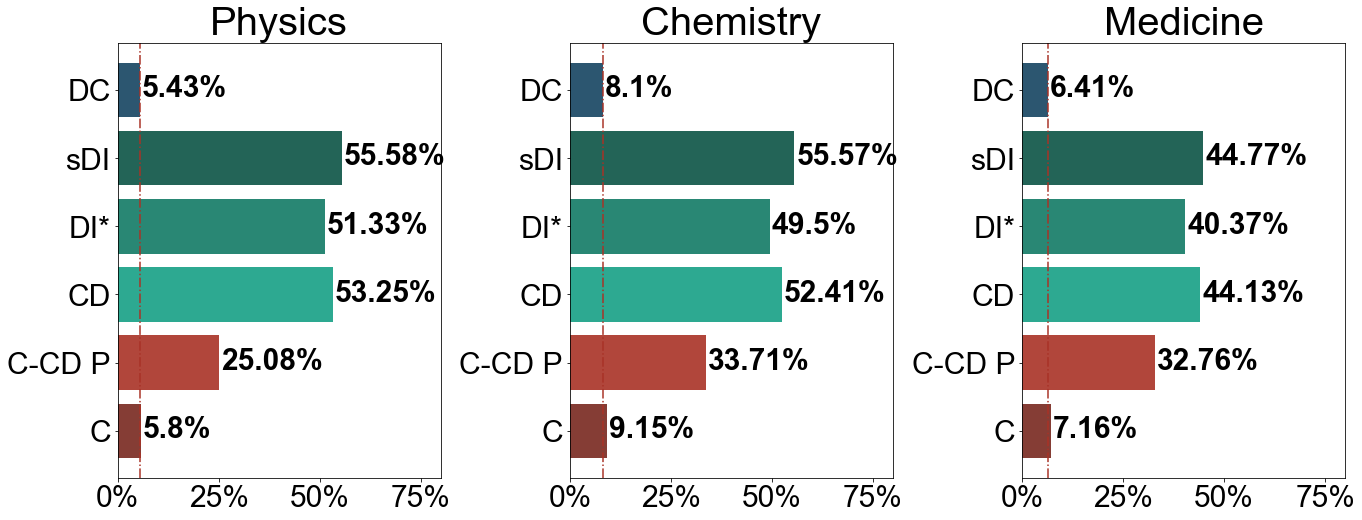

In [26]:
plt.subplots(1, 3, figsize=(22, 8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.15)

for i in range(len(flst)):
    f = flst[i]
    dlst = [get_AR(v, f) for v in vlst]
    dlst_percent = [100 * x / len(f) for x in dlst]  # convert to percentage and normalize to 100%
    xticks_percent = [int(round(x)) for x in np.linspace(0, 100, 5)]  # calculate x-axis ticks as percentage values
    ax = plt.subplot(1, 3, i + 1)
    
    c = ['#78281F' , '#A93226', '#16A085', '#117A65', '#0B5345', "#154360"]
    y_pos = [1, 2, 3, 4, 5, 6]
    plt.axvline(x=min(dlst_percent), ls='-.', c='#A93226')
    plt.barh(y_pos, dlst_percent, align='center', color=c, alpha=0.9, capsize=10)
    
    for x, v in enumerate(dlst_percent):
        plt.text(v + 0.5, x + 0.9, str(round(v, 2)) + "%", color='black', fontsize=30, fontweight='bold')
    
    plt.yticks(y_pos, ['C','C-CD P','CD', 'DI*', 'sDI', 'DC'],
               fontsize=30)
    plt.xticks(xticks_percent, [str(x) + "%" for x in xticks_percent], fontsize=30)  # set x-axis ticks as percentage values
    plt.xlim(0, 80)
    plt.title(titles[i],fontsize =40)
plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 5 6 A4\3.pdf",bbox_inches = 'tight')